In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install xgboost==1.3.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 157.5 MB 56 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
import joblib
import warnings
warnings.filterwarnings("ignore")


def load_model(path=''):
  return joblib.load(path)

In [ ]:
lr_model=load_model(r"/content/drive/MyDrive/CSE-400(Project Thesis)/lr_file_tfidf.pkl")
pac_model=load_model(r"/content/drive/MyDrive/CSE-400(Project Thesis)/pac_file.pkl")
dt_model=load_model(r"/content/drive/MyDrive/CSE-400(Project Thesis)/dt_file.pkl")
gb_model=load_model(r"/content/drive/MyDrive/CSE-400(Project Thesis)/gb_file.pkl")
adb_model=load_model(r"/content/drive/MyDrive/CSE-400(Project Thesis)/adb_file.pkl")
xgb_model=load_model(r"/content/drive/MyDrive/CSE-400(Project Thesis)/xgb_gpu_file.pkl")
lgbm_model=load_model(r"/content/drive/MyDrive/CSE-400(Project Thesis)/lgbm_file_new.pkl")
voting_model=load_model(r"/content/drive/MyDrive/CSE-400(Project Thesis)/vt_file.pkl")

In [ ]:
!pip install bnlp-toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.9 MB 1.2 MB/s 
     |████████████████████████████████| 1.2 MB 59.9 MB/s 
     |████████████████████████████████| 965 kB 56.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import pandas as pd
import numpy as np
import re
from bnlp.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *

%matplotlib inline
sns.set()

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
label_auth=pd.read_csv(r'/content/drive/MyDrive/AutoEncoders/LabeledAuthentic-7K.csv') #, nrows=3067)
label_fake=pd.read_csv(r'/content/drive/MyDrive/AutoEncoders/LabeledFake-1K.csv') #, nrows=995)
label_auth.drop(['source','relation'], axis=1, inplace=True)
label_fake.drop(['source','relation','F-type'], axis=1, inplace=True)
df=pd.concat([label_auth, label_fake], axis=0)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df['label']=np.where(df['label']==0.0, 0, 1)
df.tail()
df=df.sample(frac=1).reset_index(drop=True)
print(df.shape)
df.head()

(8501, 7)


,articleID,domain,date,category,headline,content,label
0,441,banglatribune.com,2018-09-20 10:17:36,National,চাঁপাইনবাবগঞ্জে অস্ত্র ব্যবসায়ী ও জেএমবি সদস্য...,চাঁপাইনবাবগঞ্জে বিশেষ অভিযান চালিয়ে অস্ত্র ব্য...,1
1,2786,prothomalo.com,2018-09-22 10:01:27,Sports,আফগান রূপকথা লিখতে দিলেন না মালিক,ম্যাচ শেষে পিচের ওপর বসে। কেঁদেই ফেললেন আফতাব।...,1
2,8001,independent24.com,2018-09-20 07:12:39,National,ডিজিটাল নিরাপত্তা বিল সংসদে পাস,আরো সংবাদ 'ডিজিটাল নিরাপত্তা আইন নিয়ে গণমাধ্যম...,1
3,1415,jugantor.com,2018-09-20 22:44:18,Editorial,ভাই হত্যার বিচার চাওয়ায় সাংবাদিককে সপরিবারে হত...,বাংলাদেশ ক্রাইম রিপোর্টার্স অ্যাসোসিয়েশনের (ক্...,1
4,5290,samakal.com,2018-09-20 01:12:28,Politics,খালেদা জিয়াকে মুক্তি দিয়ে নির্বাচনী পরিবেশ তৈর...,﻿বিএনপি চেয়ারপারসন খালেদা জিয়াকে মুক্তি দিয়ে ন...,1


In [ ]:
def preprocess(data):
    """This function is for preprocessing of the news contents. It removes punctuations, English characters and both of Bangla
    and English numerals. It tokenizes all the words and also removes stopwords.
    
    Args: 
        The Entire Dataframe
    Returns:
        Preprocessed news corpuses in a list of lists
    """
    corpus=[]
    for i in range(0, len(data)):
        x=re.sub('[^\u0980-\u09FF]',' ',data['content'][i])
        x=re.sub('[a-zA-Z0-9]+', ' ', x)
        x=re.sub('[০১২৩৪৫৬৭৮৯]+', ' ', x)
        x=x.split()
        x=[w for w in x if w not in set(stopwords)]
        x=' '.join(x)
        corpus.append(x)
    
    return corpus


corpus=preprocess(df)
corpus[16:20]

['ময়মনসিংহে কমিউটার ট্রেনের বিদ্যুৎ সরবরাহকারী বগির পাওয়ার কার একটিসহ লাইনচ্যুত তিনটি বগি উদ্ধার শেষে ঘণ্টা ময়মনসিংহ ঢাকা রুটে ট্রেন চলাচল হয়েছে শুক্রবার সকাল সাড়ে টা ময়মনসিংহ রেলওয়ে স্টেশনসহ স্টেশনে আটকে পড়া ট্রেনগুলো গন্তব্যস্থলের উদ্দেশ্যে যাত্রা ময়মনসিংহ রেলওয়ে স্টেশনের সুপারিনটেনডেন্ট জহুরুল ইসলাম তথ্য নিশ্চিত বৃহস্পতিবার সেপ্টেম্বর রাত সোয়া টার ফাতেমা নগর রেলওয়ে স্টেশন এলাকায় ঢাকা ছেড়ে আসা জামালপুরের দেওয়ানগঞ্জগামী কমিউটার ট্রেনের পাওয়ার কারের সাত আটি চাকা লাইনচ্যুত একইসঙ্গে বগিও লাইনচ্যুত রাত টা সাড়ে টার ঢাকা ময়মনসিংহ রিলিফ ট্রেনের উদ্ধার প্রক্রিয়া লাইনচ্যুতির ঘটনায় জামালপুরের দেওয়ানগঞ্জ ছেড়ে আসা ভাওয়াল এক্সপ্রেস ট্রেন ঢাকাগামী নং মহুয়া কমিউটার ট্রেনসহ ট্রেন আটকে পড়ে',
 'টুইটারের গ্রাহক সেবা দেওয়ার ব্যবস্থা হিসেবে ব্যবহারকারী ব্যবসা প্রতিষ্ঠানগুলোর হওয়া সরাসরি মেসেজে ত্রুটির কারণে ঘটনা ঘটেছে ইতোমধ্যে ত্রুটি সারিয়ে ফেলা হয়েছে বিবিসি প্রতিবেদনে উল্লেখ হয়েছে আক্রান্ত ব্যবহারকারীদেরকে মেসেজের সতর্ক টুইটার টুইটারের ওয়েবসাইটে লগইন অ্যাপে প্রবেশ মেসেজ পাচ্ছেন মাইক্রোব্লগিং সাইটটির পক্ষ

In [ ]:
vec=TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X=vec.fit_transform(corpus).toarray()
y=df['label'].values
X.shape, y.shape

((8501, 5000), (8501,))

In [ ]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0453037 , 0.04921945, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
lr_pred=lr_model.predict(X)
pac_pred=pac_model.predict(X)
dt_pred=dt_model.predict(X)
gb_pred=gb_model.predict(X)
adb_pred=adb_model.predict(X)
xgb_pred=xgb_model.predict(X)
lgbm_pred=lgbm_model.predict(X)
voting_pred=voting_model.predict(X)

In [ ]:
print(f'Actual Outcomes ---> {y[:10]}')
print(f'Prediction Outcomes in Logistic Regression Model ---> {lr_pred[:10]}')
print(f'Prediction Outcomes in Passive Aggressive Classifier Model ---> {pac_pred[:10]}')
print(f'Prediction Outcomes in Decision Tree Model ---> {dt_pred[:10]}')
print(f'Prediction Outcomes in Gradient Boosting Model ---> {gb_pred[:10]}')
print(f'Prediction Outcomes in Adaptive Gradient Boosting Model ---> {adb_pred[:10]}')
print(f'Prediction Outcomes in Extreme Gradient Boosting Model ---> {xgb_pred[:10]}')
print(f'Prediction Outcomes in Light Gradient Boosted Machine Model ---> {lgbm_pred[:10]}')
print(f'Prediction Outcomes in Voting Classifier(lr+pac+dt+light) Model ---> {voting_pred[:10]}')

Actual Outcomes ---> [1 1 1 1 1 1 1 0 1 0]
Prediction Outcomes in Logistic Regression Model ---> [0 0 1 1 0 0 1 0 0 0]
Prediction Outcomes in Passive Aggressive Classifier Model ---> [1 1 1 1 1 1 1 1 1 1]
Prediction Outcomes in Decision Tree Model ---> [1 1 1 1 1 1 1 1 1 1]
Prediction Outcomes in Gradient Boosting Model ---> [0 0 0 0 0 0 0 0 0 0]
Prediction Outcomes in Adaptive Gradient Boosting Model ---> [0 1 0 0 0 0 0 0 0 0]
Prediction Outcomes in Extreme Gradient Boosting Model ---> [1 1 1 1 1 1 1 1 1 1]
Prediction Outcomes in Light Gradient Boosted Machine Model ---> [0 1 0 0 0 0 1 0 0 0]
Prediction Outcomes in Voting Classifier(lr+pac+dt+light) Model ---> [1 1 1 1 0 0 1 0 0 1]


In [ ]:
def model_accuracy(pred):
  return accuracy_score(y, pred)

lr_accuracy=model_accuracy(lr_pred).round(2)
pac_accuracy=model_accuracy(pac_pred).round(2)
dt_accuracy=model_accuracy(dt_pred).round(2)
gb_accuracy=model_accuracy(gb_pred).round(2)
adb_accuracy=model_accuracy(adb_pred).round(2)
xgb_accuracy=model_accuracy(xgb_pred).round(2)
lgbm_accuracy=model_accuracy(lgbm_pred).round(2)
voting_accuracy=model_accuracy(voting_pred).round(2)

accuracy_scores={'Models Used':['Logistic Regression', 'Passive Aggressive Classifier', 'Decision Tree', 'Gradient Boosting', 'Adaptive Gradient Boosting', 'Extreme Gradient Boosting', 'Light Gradient Boosted Machine', 'Voting Classifier(lr+pac+dt+light)'],
                 'Accuracy':[lr_accuracy, pac_accuracy, dt_accuracy, gb_accuracy, adb_accuracy, xgb_accuracy, lgbm_accuracy, voting_accuracy]}

df_acc=pd.DataFrame(accuracy_scores)
df_acc

,Models Used,Accuracy
0,Logistic Regression,0.31
1,Passive Aggressive Classifier,0.77
2,Decision Tree,0.80
3,Gradient Boosting,0.18
4,Adaptive Gradient Boosting,0.31
5,Extreme Gradient Boosting,0.82
6,Light Gradient Boosted Machine,0.44
7,Voting Classifier(lr+pac+dt+light),0.57


In [ ]:
df_acc=df_acc.sort_values('Accuracy')
df_acc

,Models Used,Accuracy
3,Gradient Boosting,0.18
0,Logistic Regression,0.31
4,Adaptive Gradient Boosting,0.31
6,Light Gradient Boosted Machine,0.44
7,Voting Classifier(lr+pac+dt+light),0.57
1,Passive Aggressive Classifier,0.77
2,Decision Tree,0.80
5,Extreme Gradient Boosting,0.82


In [ ]:
df_acc.to_csv('/content/drive/MyDrive/CSE-400(Project Thesis)/Accuarcy_ML_tfidf.csv', index=False)

In [ ]:
acc_df=df_acc.set_index('Models Used')
acc_df

,Accuracy
Models Used,
Gradient Boosting,0.18
Logistic Regression,0.31
Adaptive Gradient Boosting,0.31
Light Gradient Boosted Machine,0.44
Voting Classifier(lr+pac+dt+light),0.57
Passive Aggressive Classifier,0.77
Decision Tree,0.80
Extreme Gradient Boosting,0.82


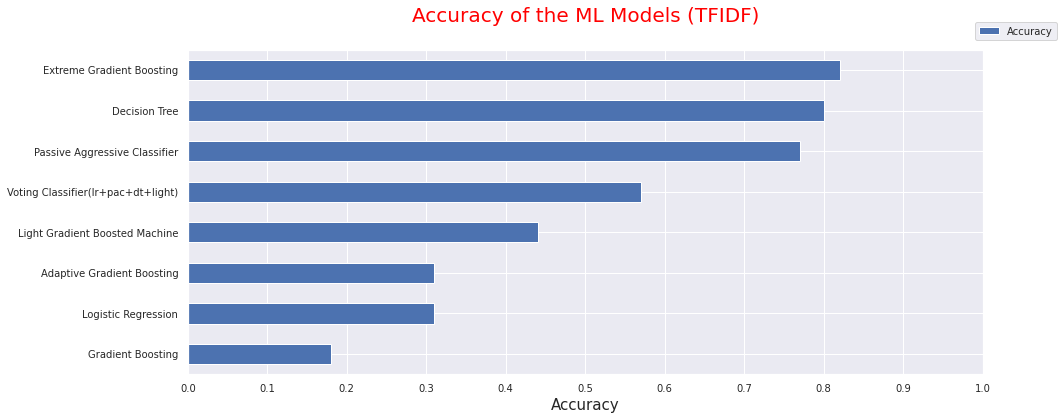

In [ ]:
acc_df.plot.barh(figsize=(15, 6));
plt.ylabel('')
plt.xlabel('Accuracy', fontsize=15)
plt.title('Accuracy of the ML Models (TFIDF)\n', fontsize=20, color='red')
plt.legend(bbox_to_anchor=(1.1, 1.1), fontsize=10)
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0], fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
cm=confusion_matrix(y, lr_pred)
recall=np.diag(cm) / np.sum(cm, axis=1)
precision=np.diag(cm) / np.sum(cm, axis=0)
label_names=['fake', 'real']
df_cm=pd.DataFrame(cm, index=label_names, columns=label_names)
df_cm

,fake,real
fake,1067,232
real,5609,1593


In [ ]:
fake_recall=recall[0].round(2)
fake_precision=precision[0].round(2)
fake_f1_score=(2*fake_recall*fake_precision)/(fake_recall+fake_precision)
fake_f1_score

0.2677551020408163

In [ ]:
def fake_news_performance(pred, model_name=''):
  cm=confusion_matrix(y, pred)
  recall=np.diag(cm) / np.sum(cm, axis=1)
  precision=np.diag(cm) / np.sum(cm, axis=0)
  fake_recall=recall[0].round(2)
  fake_precision=precision[0].round(2)
  fake_f1_score=(2*fake_recall*fake_precision)/(fake_recall+fake_precision)
  fake_f1_score=fake_f1_score.round(2)
  label_names=['fake', 'real']
  df_cm=pd.DataFrame(cm, index=label_names, columns=label_names)
  plt.figure(figsize=(15, 6))
  sns.heatmap(df_cm, annot=True, annot_kws={"size": 20}, fmt='g')
  plt.xticks(fontsize=25)
  plt.yticks(rotation=0, fontsize=25)
  plt.title('\nConfusion Matrix for '+model_name+' (TFIDF)\n', fontsize=30, color='red')
  plt.show()
    
  print('-----------------------------------------------------------------------------------------------------------------')
  print(f'\nClassification Report for:--> {model_name} (TFIDF) \n{classification_report(y, pred, target_names=label_names)}')

  return fake_precision, fake_recall, fake_f1_score

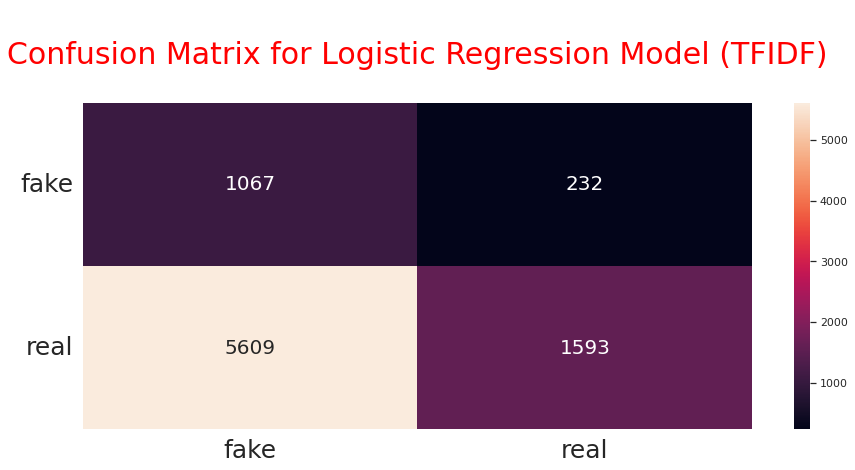

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> Logistic Regression Model (TFIDF) 
              precision    recall  f1-score   support

        fake       0.16      0.82      0.27      1299
        real       0.87      0.22      0.35      7202

    accuracy                           0.31      8501
   macro avg       0.52      0.52      0.31      8501
weighted avg       0.76      0.31      0.34      8501



In [ ]:
fake_precision_lr, fake_recall_lr, fake_f1_score_lr=fake_news_performance(lr_pred, 'Logistic Regression Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using Logistic Regression Model --> {fake_precision_lr, fake_recall_lr, fake_f1_score_lr}, respectively')

Precision, Recall and F1 Score for Fake News Classification using Logistic Regression Model --> (0.16, 0.82, 0.27), respectively


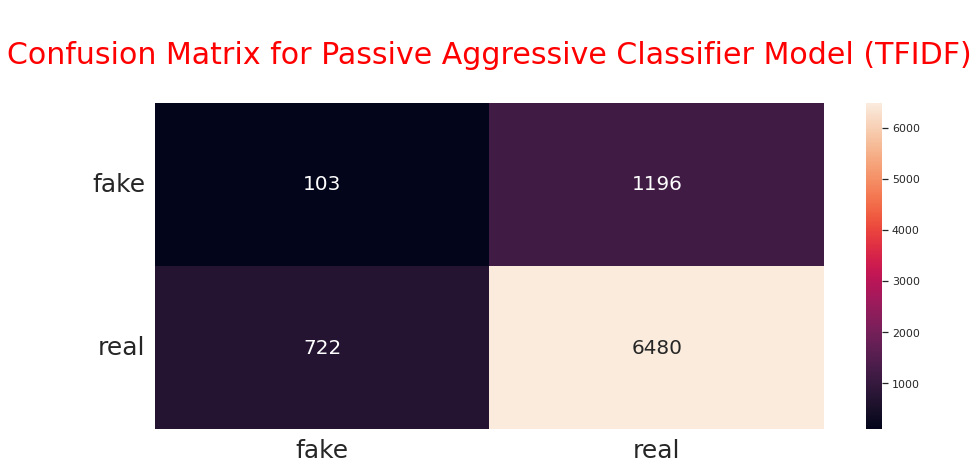

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> Passive Aggressive Classifier Model (TFIDF) 
              precision    recall  f1-score   support

        fake       0.12      0.08      0.10      1299
        real       0.84      0.90      0.87      7202

    accuracy                           0.77      8501
   macro avg       0.48      0.49      0.48      8501
weighted avg       0.73      0.77      0.75      8501



In [ ]:
fake_precision_pac, fake_recall_pac, fake_f1_score_pac=fake_news_performance(pac_pred, 'Passive Aggressive Classifier Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using Passive Aggressive Classifier Model --> {fake_precision_pac, fake_recall_pac, fake_f1_score_pac}, respectively')

Precision, Recall and F1 Score for Fake News Classification using Passive Aggressive Classifier Model --> (0.12, 0.08, 0.1), respectively


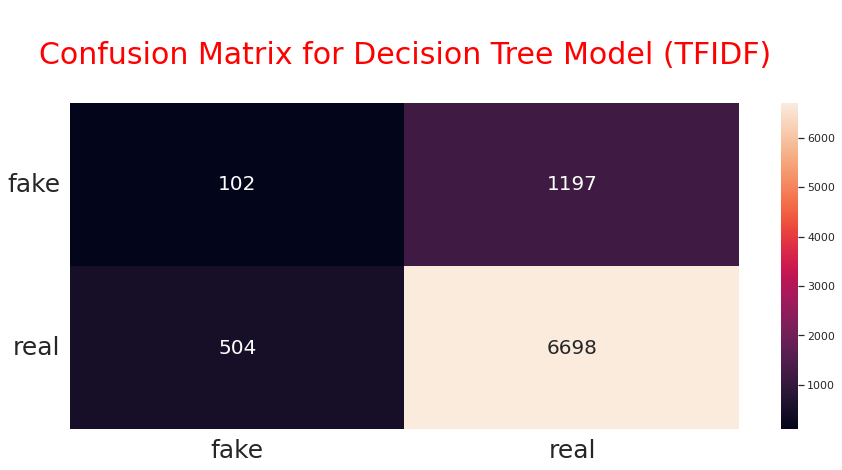

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> Decision Tree Model (TFIDF) 
              precision    recall  f1-score   support

        fake       0.17      0.08      0.11      1299
        real       0.85      0.93      0.89      7202

    accuracy                           0.80      8501
   macro avg       0.51      0.50      0.50      8501
weighted avg       0.74      0.80      0.77      8501



In [ ]:
fake_precision_dt, fake_recall_dt, fake_f1_score_dt=fake_news_performance(dt_pred, 'Decision Tree Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using Decision Tree Model --> {fake_precision_dt, fake_recall_dt, fake_f1_score_dt}, respectively')

Precision, Recall and F1 Score for Fake News Classification using Decision Tree Model --> (0.17, 0.08, 0.11), respectively


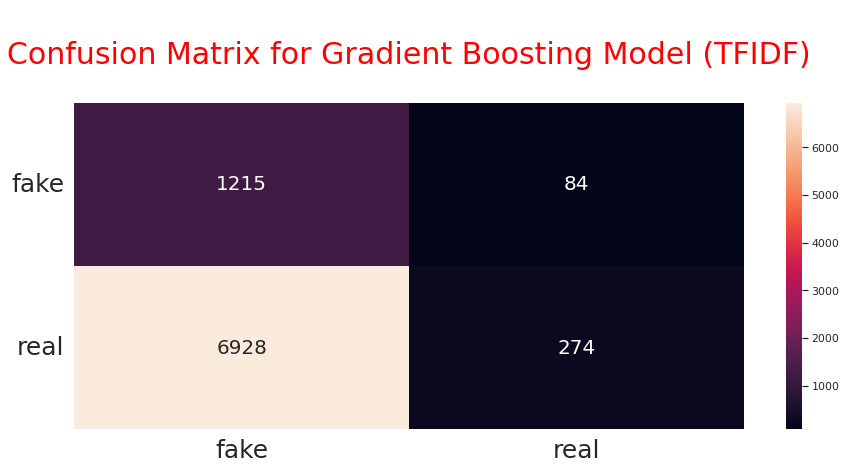

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> Gradient Boosting Model (TFIDF) 
              precision    recall  f1-score   support

        fake       0.15      0.94      0.26      1299
        real       0.77      0.04      0.07      7202

    accuracy                           0.18      8501
   macro avg       0.46      0.49      0.16      8501
weighted avg       0.67      0.18      0.10      8501



In [ ]:
fake_precision_gb, fake_recall_gb, fake_f1_score_gb=fake_news_performance(gb_pred, 'Gradient Boosting Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using Gradient Boosting Model --> {fake_precision_gb, fake_recall_gb, fake_f1_score_gb}, respectively')

Precision, Recall and F1 Score for Fake News Classification using Gradient Boosting Model --> (0.15, 0.94, 0.26), respectively


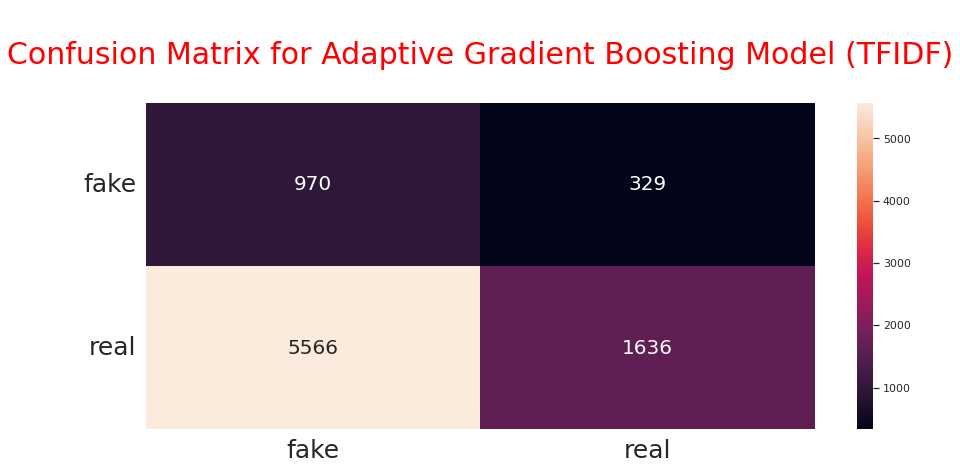

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> Adaptive Gradient Boosting Model (TFIDF) 
              precision    recall  f1-score   support

        fake       0.15      0.75      0.25      1299
        real       0.83      0.23      0.36      7202

    accuracy                           0.31      8501
   macro avg       0.49      0.49      0.30      8501
weighted avg       0.73      0.31      0.34      8501



In [ ]:
fake_precision_adb, fake_recall_adb, fake_f1_score_adb=fake_news_performance(adb_pred, 'Adaptive Gradient Boosting Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using Adaptive Gradient Boosting Model --> {fake_precision_adb, fake_recall_adb, fake_f1_score_adb}, respectively')

Precision, Recall and F1 Score for Fake News Classification using Adaptive Gradient Boosting Model --> (0.15, 0.75, 0.25), respectively


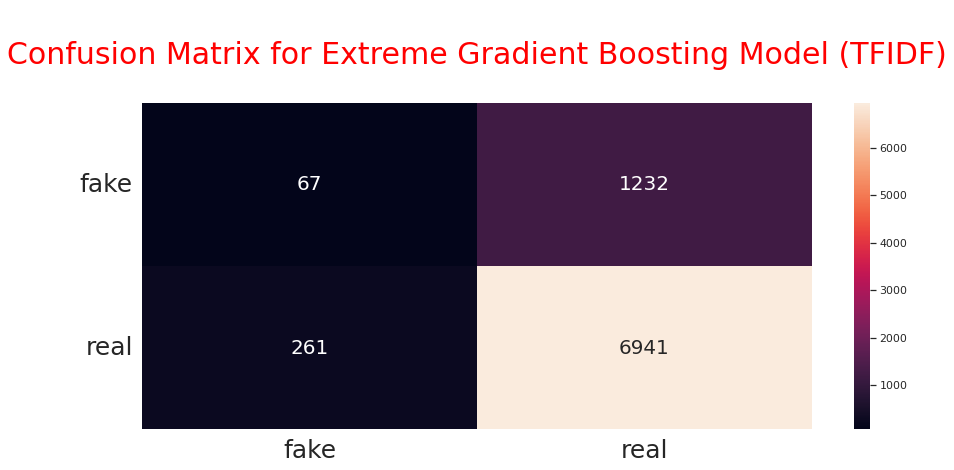

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> Extreme Gradient Boosting Model (TFIDF) 
              precision    recall  f1-score   support

        fake       0.20      0.05      0.08      1299
        real       0.85      0.96      0.90      7202

    accuracy                           0.82      8501
   macro avg       0.53      0.51      0.49      8501
weighted avg       0.75      0.82      0.78      8501



In [ ]:
fake_precision_xgb, fake_recall_xgb, fake_f1_score_xgb=fake_news_performance(xgb_pred, 'Extreme Gradient Boosting Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using Extreme Gradient Boosting Model --> {fake_precision_xgb, fake_recall_xgb, fake_f1_score_xgb}, respectively')

Precision, Recall and F1 Score for Fake News Classification using Extreme Gradient Boosting Model --> (0.2, 0.05, 0.08), respectively


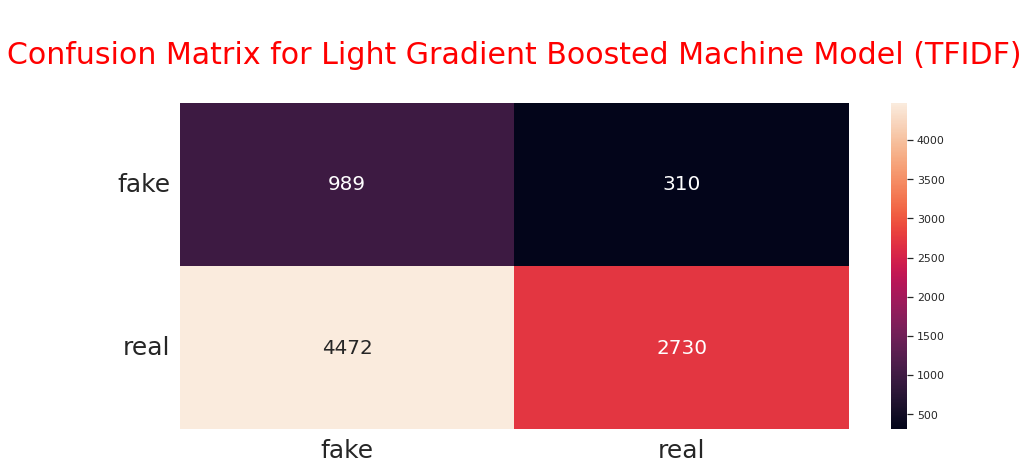

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> Light Gradient Boosted Machine Model (TFIDF) 
              precision    recall  f1-score   support

        fake       0.18      0.76      0.29      1299
        real       0.90      0.38      0.53      7202

    accuracy                           0.44      8501
   macro avg       0.54      0.57      0.41      8501
weighted avg       0.79      0.44      0.50      8501



In [ ]:
fake_precision_lgbm, fake_recall_lgbm, fake_f1_score_lgbm=fake_news_performance(lgbm_pred, 'Light Gradient Boosted Machine Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using Light Gradient Boosted Machine Model --> {fake_precision_lgbm, fake_recall_lgbm, fake_f1_score_lgbm}, respectively')

Precision, Recall and F1 Score for Fake News Classification using Light Gradient Boosted Machine Model --> (0.18, 0.76, 0.29), respectively


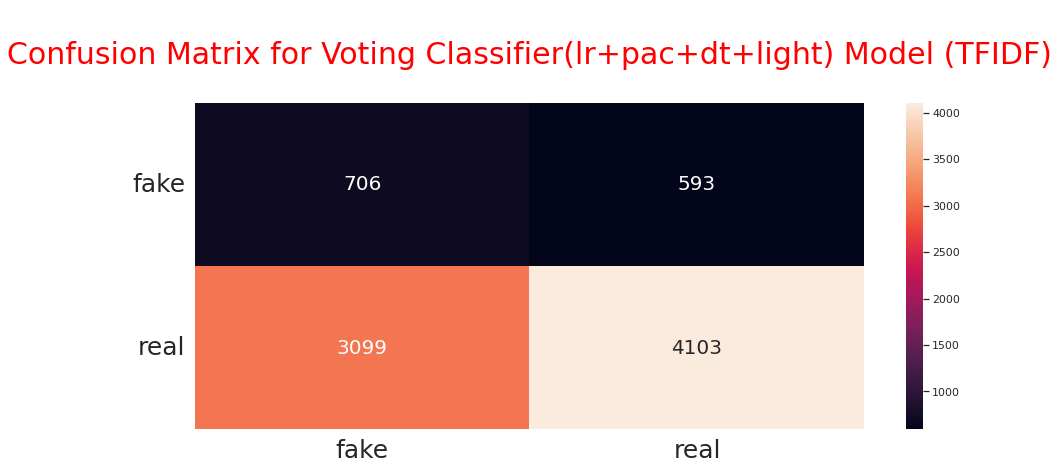

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> Voting Classifier(lr+pac+dt+light) Model (TFIDF) 
              precision    recall  f1-score   support

        fake       0.19      0.54      0.28      1299
        real       0.87      0.57      0.69      7202

    accuracy                           0.57      8501
   macro avg       0.53      0.56      0.48      8501
weighted avg       0.77      0.57      0.63      8501



In [ ]:
fake_precision_voting, fake_recall_voting, fake_f1_score_voting=fake_news_performance(voting_pred, 'Voting Classifier(lr+pac+dt+light) Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using Voting Classifier(lr+pac+dt+light) Model --> {fake_precision_voting, fake_recall_voting, fake_f1_score_voting}, respectively')

Precision, Recall and F1 Score for Fake News Classification using Voting Classifier(lr+pac+dt+light) Model --> (0.19, 0.54, 0.28), respectively


In [ ]:
fake_perform={'Models Used':['Logistic Regression', 'Passive Aggressive Classifier', 'Decision Tree', 'Gradient Boosting', 'Adaptive Gradient Boosting', 'Extreme Gradient Boosting', 'Light Gradient Boosted Machine', 'Voting Classifier(lr+pac+dt+light)'],
              'Precision_fake':[fake_precision_lr, fake_precision_pac, fake_precision_dt, fake_precision_gb, fake_precision_adb, fake_precision_xgb, fake_precision_lgbm, fake_precision_voting], 
              'Recall_fake':[fake_recall_lr, fake_recall_pac, fake_recall_dt, fake_recall_gb, fake_recall_adb, fake_recall_xgb, fake_recall_lgbm, fake_recall_voting], 
              'F1-Score_fake':[fake_f1_score_lr, fake_f1_score_pac, fake_f1_score_dt, fake_f1_score_gb, fake_f1_score_adb, fake_f1_score_xgb, fake_f1_score_lgbm, fake_f1_score_voting], 
              'Overall_Accuracy':[lr_accuracy, pac_accuracy, dt_accuracy, gb_accuracy, adb_accuracy, xgb_accuracy, lgbm_accuracy, voting_accuracy]}

df_fake_perform=pd.DataFrame(fake_perform)
df_fake_perform

,Models Used,Precision_fake,Recall_fake,F1-Score_fake,Overall_Accuracy
0,Logistic Regression,0.16,0.82,0.27,0.31
1,Passive Aggressive Classifier,0.12,0.08,0.10,0.77
2,Decision Tree,0.17,0.08,0.11,0.80
3,Gradient Boosting,0.15,0.94,0.26,0.18
4,Adaptive Gradient Boosting,0.15,0.75,0.25,0.31
5,Extreme Gradient Boosting,0.20,0.05,0.08,0.82
6,Light Gradient Boosted Machine,0.18,0.76,0.29,0.44
7,Voting Classifier(lr+pac+dt+light),0.19,0.54,0.28,0.57


In [ ]:
df_fake_perform.to_csv('/content/drive/MyDrive/CSE-400(Project Thesis)/fake_news_detection_performance_tfidf.csv', index=False)

In [ ]:
df_fake_perform.groupby('Models Used')['Precision_fake'].sum().sort_values(ascending=False)

Models Used
Extreme Gradient Boosting             0.20
Voting Classifier(lr+pac+dt+light)    0.19
Light Gradient Boosted Machine        0.18
Decision Tree                         0.17
Logistic Regression                   0.16
Adaptive Gradient Boosting            0.15
Gradient Boosting                     0.15
Passive Aggressive Classifier         0.12
Name: Precision_fake, dtype: float64

In [ ]:
df_fake_perform.groupby('Models Used')['Recall_fake'].sum().sort_values(ascending=False)

Models Used
Gradient Boosting                     0.94
Logistic Regression                   0.82
Light Gradient Boosted Machine        0.76
Adaptive Gradient Boosting            0.75
Voting Classifier(lr+pac+dt+light)    0.54
Decision Tree                         0.08
Passive Aggressive Classifier         0.08
Extreme Gradient Boosting             0.05
Name: Recall_fake, dtype: float64

In [ ]:
df_fake_perform.groupby('Models Used')['F1-Score_fake'].sum().sort_values(ascending=False)

Models Used
Light Gradient Boosted Machine        0.29
Voting Classifier(lr+pac+dt+light)    0.28
Logistic Regression                   0.27
Gradient Boosting                     0.26
Adaptive Gradient Boosting            0.25
Decision Tree                         0.11
Passive Aggressive Classifier         0.10
Extreme Gradient Boosting             0.08
Name: F1-Score_fake, dtype: float64

In [ ]:
df_fake_perform.set_index('Models Used', inplace=True)
df_fake_perform.sort_values('F1-Score_fake', ascending=False, inplace=True)
df_fake_perform

,Precision_fake,Recall_fake,F1-Score_fake,Overall_Accuracy
Models Used,,,,
Light Gradient Boosted Machine,0.18,0.76,0.29,0.44
Voting Classifier(lr+pac+dt+light),0.19,0.54,0.28,0.57
Logistic Regression,0.16,0.82,0.27,0.31
Gradient Boosting,0.15,0.94,0.26,0.18
Adaptive Gradient Boosting,0.15,0.75,0.25,0.31
Decision Tree,0.17,0.08,0.11,0.80
Passive Aggressive Classifier,0.12,0.08,0.10,0.77
Extreme Gradient Boosting,0.20,0.05,0.08,0.82


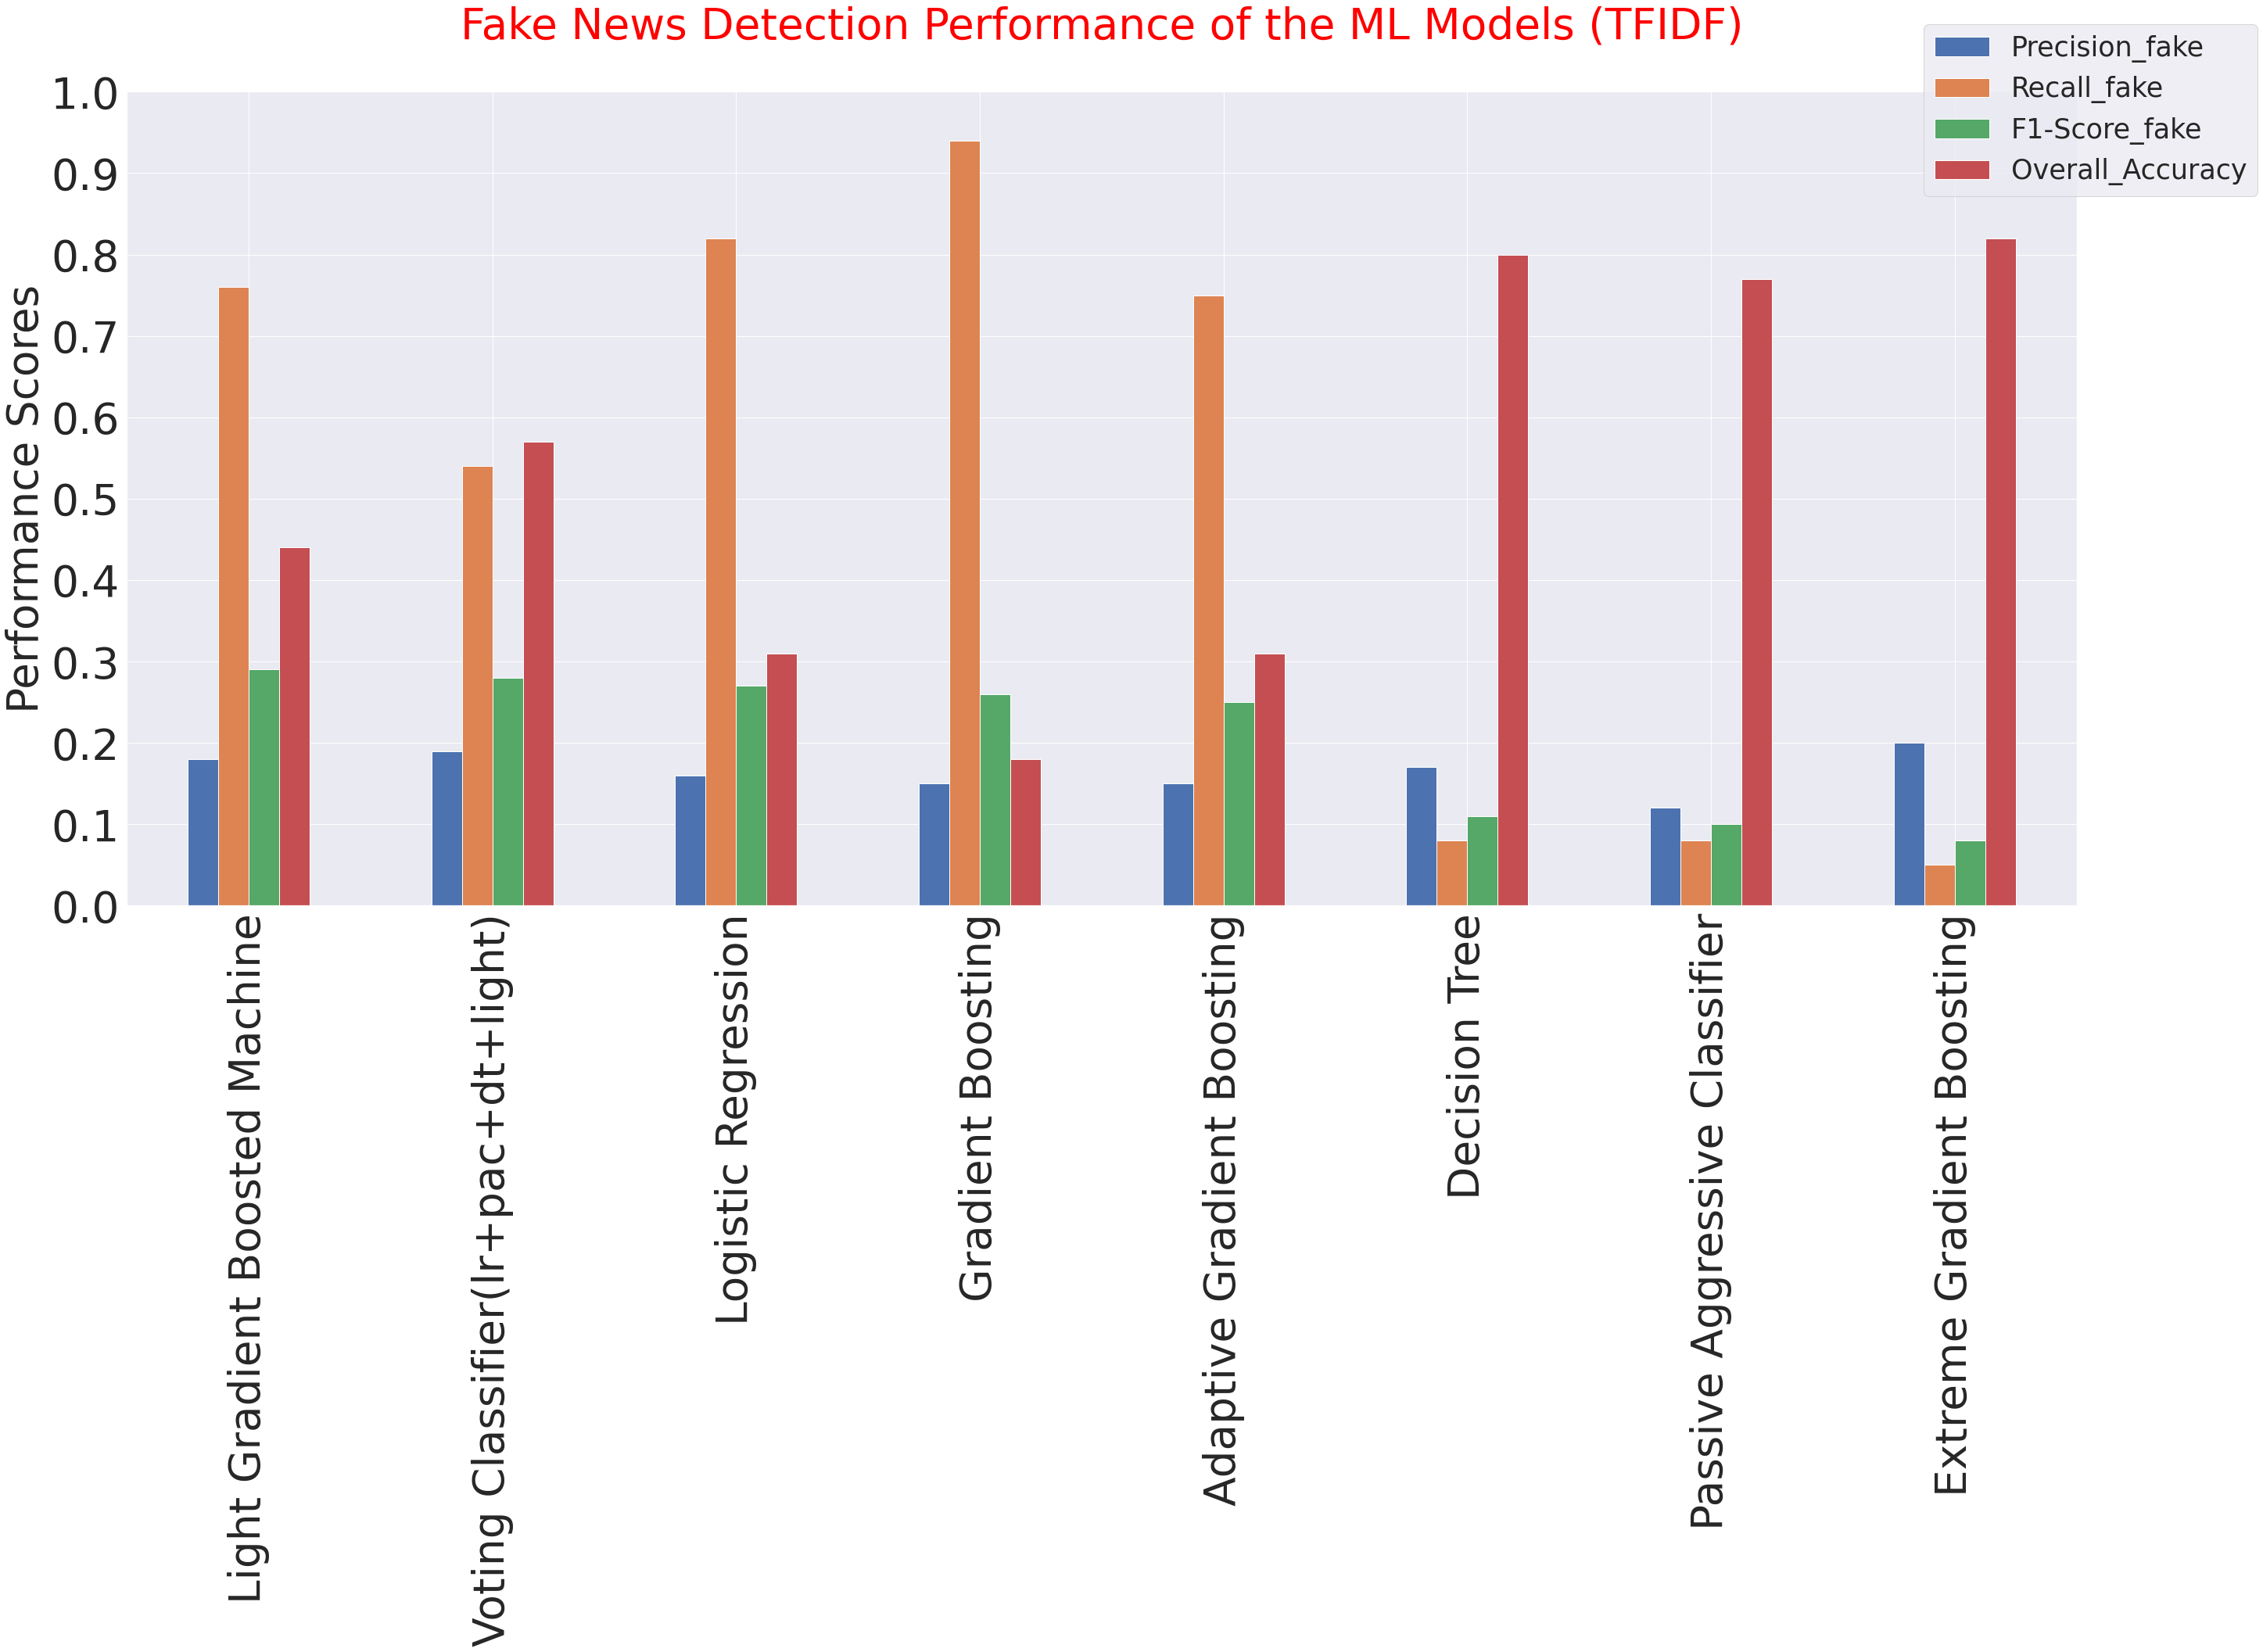

In [ ]:
df_fake_perform.plot.bar(rot=90, figsize=(40, 30));
plt.xlabel('')
plt.ylabel('Performance Scores', fontsize=55)
plt.title('Fake News Detection Performance of the ML Models (TFIDF)\n', fontsize=55, color='red')
plt.legend(bbox_to_anchor=(1.1, 1.1), fontsize=35)
plt.yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0], fontsize=55)
plt.xticks(fontsize=55)
plt.tight_layout()
plt.show()

In [ ]:
fallout_lr, sensitivity_lr, thresholds_lr=roc_curve(y, lr_pred)
fallout_pac, sensitivity_pac, thresholds_pac=roc_curve(y, pac_pred)
fallout_dt, sensitivity_dt, thresholds_dt=roc_curve(y, dt_pred)
fallout_gb, sensitivity_gb, thresholds_gb=roc_curve(y, gb_pred)
fallout_adb, sensitivity_adb, thresholds_adb=roc_curve(y, adb_pred)
fallout_xgb, sensitivity_xgb, thresholds_xgb=roc_curve(y, xgb_pred)
fallout_lgbm, sensitivity_lgbm, thresholds_lgbm=roc_curve(y, lgbm_pred)
fallout_voting, sensitivity_voting, thresholds_voting=roc_curve(y, voting_pred)

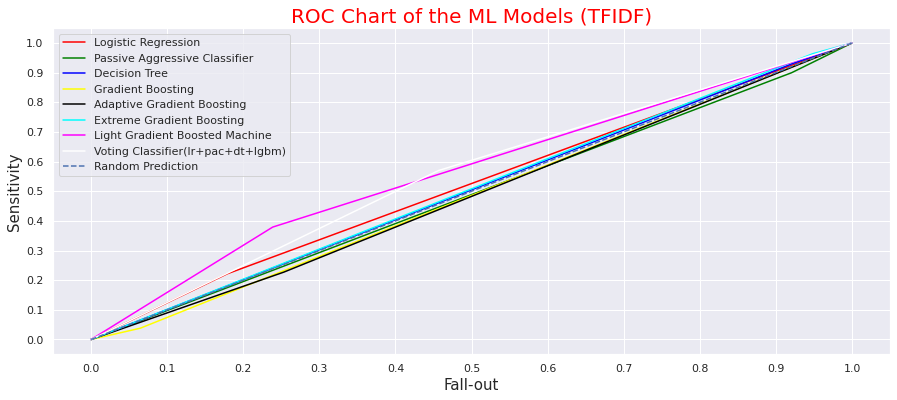

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(fallout_lr, sensitivity_lr, color='red', label='%s' % 'Logistic Regression')
plt.plot(fallout_pac, sensitivity_pac, color='green', label='%s' % 'Passive Aggressive Classifier')
plt.plot(fallout_dt, sensitivity_dt, color='blue', label='%s' % 'Decision Tree')
plt.plot(fallout_gb, sensitivity_gb, color='yellow', label='%s' % 'Gradient Boosting')
plt.plot(fallout_adb, sensitivity_adb, color='black', label='%s' % 'Adaptive Gradient Boosting')
plt.plot(fallout_xgb, sensitivity_xgb, color='cyan', label='%s' % 'Extreme Gradient Boosting')
plt.plot(fallout_lgbm, sensitivity_lgbm, color='magenta', label='%s' % 'Light Gradient Boosted Machine')
plt.plot(fallout_voting, sensitivity_voting, color='white', label='%s' % 'Voting Classifier(lr+pac+dt+lgbm)')
plt.plot([0,1], [0,1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart of the ML Models (TFIDF)", color='red', fontsize=20)
plt.xlabel("Fall-out", fontsize=15)
plt.ylabel("Sensitivity", fontsize=15)
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])
plt.yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])
plt.legend(loc='best')
plt.show()

In [ ]:
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y, lr_pred))
print("Passive Aggressive Classifier AUC Score: %0.2f" % roc_auc_score(y, pac_pred))
print("Decision Tree Classifier AUC Score: %0.2f" % roc_auc_score(y, dt_pred))
print("Gradient Boosting AUC Score: %0.2f" % roc_auc_score(y, gb_pred))
print(" Adaptive Gradient Boosting AUC Score: %0.2f" % roc_auc_score(y, adb_pred))
print("Extreme Gradient Boosting AUC Score: %0.2f" % roc_auc_score(y, xgb_pred))
print(" Light Gradient Boosted Machine AUC Score: %0.2f" % roc_auc_score(y, lgbm_pred))
print("Voting Classifier(lr+pac+dt+lgbm) AUC Score: %0.2f" % roc_auc_score(y, voting_pred))

Logistic Regression AUC Score: 0.52
Passive Aggressive Classifier AUC Score: 0.49
Decision Tree Classifier AUC Score: 0.50
Gradient Boosting AUC Score: 0.49
 Adaptive Gradient Boosting AUC Score: 0.49
Extreme Gradient Boosting AUC Score: 0.51
 Light Gradient Boosted Machine AUC Score: 0.57
Voting Classifier(lr+pac+dt+lgbm) AUC Score: 0.56


In [ ]:
def model_roc_auc_score(pred):
  return roc_auc_score(y, pred)

lr_auc=model_roc_auc_score(lr_pred).round(2)
pac_auc=model_roc_auc_score(pac_pred).round(2)
dt_auc=model_roc_auc_score(dt_pred).round(2)
gb_auc=model_roc_auc_score(gb_pred).round(2)
adb_auc=model_roc_auc_score(adb_pred).round(2)
xgb_auc=model_roc_auc_score(xgb_pred).round(2)
lgbm_auc=model_roc_auc_score(lgbm_pred).round(2)
voting_auc=model_roc_auc_score(voting_pred).round(2)

auc_scores={'Models Used':['Logistic Regression', 'Passive Aggressive Classifier', 'Decision Tree', 'Gradient Boosting', 'Adaptive Gradient Boosting', 'Extreme Gradient Boosting', 'Light Gradient Boosted Machine', 'Voting Classifier(lr+pac+dt+light)'],
            'AUC':[lr_auc, pac_auc, dt_auc, gb_auc, adb_auc, xgb_auc, lgbm_auc, voting_auc]}

df_auc=pd.DataFrame(auc_scores)
df_auc

,Models Used,AUC
0,Logistic Regression,0.52
1,Passive Aggressive Classifier,0.49
2,Decision Tree,0.50
3,Gradient Boosting,0.49
4,Adaptive Gradient Boosting,0.49
5,Extreme Gradient Boosting,0.51
6,Light Gradient Boosted Machine,0.57
7,Voting Classifier(lr+pac+dt+light),0.56


In [ ]:
df_auc=df_auc.sort_values('AUC')
df_auc

,Models Used,AUC
1,Passive Aggressive Classifier,0.49
3,Gradient Boosting,0.49
4,Adaptive Gradient Boosting,0.49
2,Decision Tree,0.50
5,Extreme Gradient Boosting,0.51
0,Logistic Regression,0.52
7,Voting Classifier(lr+pac+dt+light),0.56
6,Light Gradient Boosted Machine,0.57


In [ ]:
df_auc.to_csv('/content/drive/MyDrive/CSE-400(Project Thesis)/AUC_Scores_tfidf.csv', index=False)

In [ ]:
auc_df=df_auc.set_index('Models Used')
auc_df

,AUC
Models Used,
Passive Aggressive Classifier,0.49
Gradient Boosting,0.49
Adaptive Gradient Boosting,0.49
Decision Tree,0.50
Extreme Gradient Boosting,0.51
Logistic Regression,0.52
Voting Classifier(lr+pac+dt+light),0.56
Light Gradient Boosted Machine,0.57


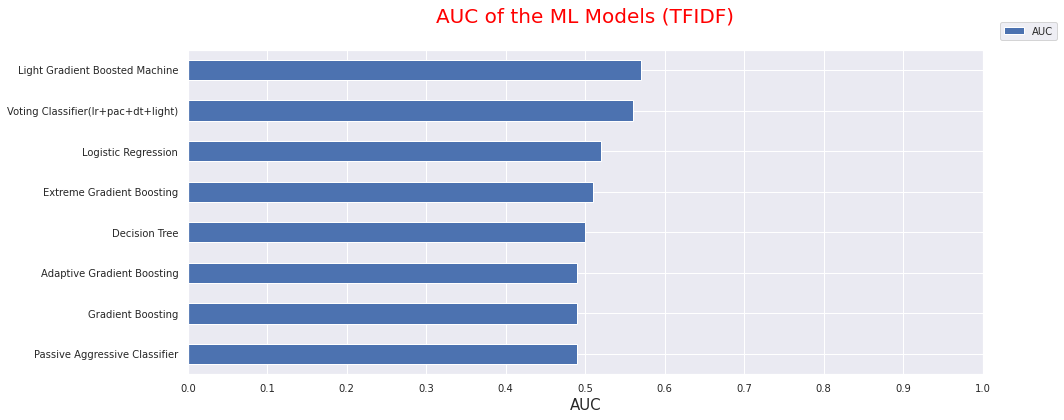

In [ ]:
auc_df.plot.barh(figsize=(15, 6));
plt.ylabel('')
plt.xlabel('AUC', fontsize=15)
plt.title('AUC of the ML Models (TFIDF)\n', fontsize=20, color='red')
plt.legend(bbox_to_anchor=(1.1, 1.1), fontsize=10)
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0], fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()